## Week 10 -- Regression & Binary Classification
Learning Objectives:


*   Plot and analyse data using MatplotLib
*   Get familiar with Numpy
*   Understand how linear regression and multiple regressions works
*   Understand how K-NN algorithm works
*   Use SKlearn to perform regression and binary classification using KNN



# Question 2
Five number summary
* The function is to take in a 2D numpy array
* If it is otherwise, it is to return None 
* Plotting the boxplot is made an optional part of the question. 
* There is no need to submit the code for the boxplot

Students should plot the boxplot first, students do not need to submit this code. 


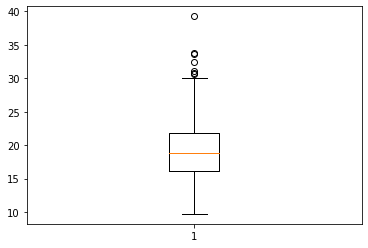

TEST 1----
[{'minimum': 9.71, 'first quartile': 16.17, 'median': 18.84, 'third quartile': 21.8, 'maximum': 39.28}]
TEST 2----
[[ 17.99  10.38 122.8 ]
 [ 20.57  17.77 132.9 ]
 [ 19.69  21.25 130.  ]
 ...
 [ 16.6   28.08 108.3 ]
 [ 20.6   29.33 140.1 ]
 [  7.76  24.54  47.92]]
[{'minimum': 6.981, 'first quartile': 11.7, 'median': 13.37, 'third quartile': 15.78, 'maximum': 28.11}, {'minimum': 9.71, 'first quartile': 16.17, 'median': 18.84, 'third quartile': 21.8, 'maximum': 39.28}, {'minimum': 43.79, 'first quartile': 75.17, 'median': 86.24, 'third quartile': 104.1, 'maximum': 188.5}]
=====END OF QN 2======


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix

bunchobject = datasets.load_breast_cancer()
#bunchobject.data is like 2D array with 569 rows and 
first_column = bunchobject.data[:,[1]]
plt.boxplot(first_column)
plt.show()


def five_number_summary(x):
    '''takes in a numpy array 
    returns a five number summary for each column 
    as a dictionary'''

    row, column = x.shape
    output = []

    for i in range(column): # this will iterate from 1st column to nth column
        five_number_dictionary = {
            'minimum': np.min(x[:,i]), 
            'first quartile': np.percentile(x[:,i], 25),
            'median': np.median(x[:,i]),
            'third quartile': np.percentile(x[:,i],75),
            'maximum': np.max(x[:,i])
        }
        output.append(five_number_dictionary)

    return output



print("TEST 1----")
first_column = bunchobject.data[:,[1]]
print( five_number_summary(first_column) ) 

print("TEST 2----")
col_no = [0,1,2]
some_columns = bunchobject.data[:,col_no]
print( five_number_summary(some_columns) )

print("=====END OF QN 2======")

## Question 3
Min/Max normalization <br>
The students ought to be able to work this out from a linear equation. <br>
In any case, the formula is x* = (x - xmin)/(xmax - xmin) 


In [3]:
def normalize_minmax(data):
    
    return None



first_column = bunchobject.data[:,[1]]
print(first_column.shape)
xx = normalize_minmax(first_column)
# print('normalized', five_number_summary(xx))


cols = [1, 7]
some_columns = bunchobject.data[:,cols]
snorm = normalize_minmax(some_columns)
# print('normalized', five_number_summary(snorm))

(569, 1)


# Question 4
k-Nearest Neighbours classification

students should plot a bar chart at the beginning of this question

No need to submit to vocareum

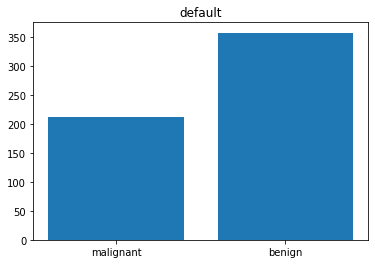

None


In [2]:
def display_bar_chart(positions, counts, names, title_name='default' ):
    
    plt.bar(positions, counts, align='center')
    plt.xticks(positions, names)
    plt.title(title_name)
    plt.show()




unique, counts = np.unique(bunchobject.target, return_counts = True)
display_bar_chart(unique, counts, bunchobject.target_names)



from sklearn.model_selection import train_test_split 

def knn_classifier(bunchobject, feature_list, size, seed , k ): 
    
    return None



features = range(20) #specifying that the first 20 features are included in the model
results = knn_classifier(bunchobject, features, 0.40, 2752, 3)
print(results)



# Question 5
Display scatter and perform linear regression using SKlearn

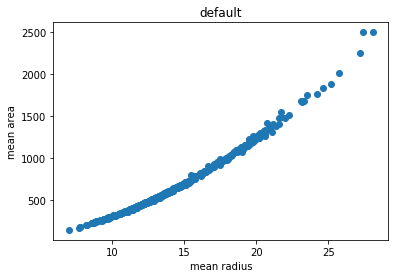

C:\src\Anaconda\lib\site-packages\ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


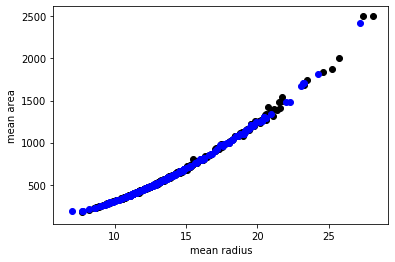

In [10]:


def display_scatter(x,y, xlabel='x', ylabel='y',title_name ='default'): 
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title_name)
    plt.show()


x_index = 0
y_index = 3

x = bunchobject.data[:,x_index] 
y = bunchobject.data[:,y_index]

x_label = bunchobject.feature_names[x_index]
y_label = bunchobject.feature_names[y_index]

display_scatter(x,y,x_label,y_label)


from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble


def linear_regression(bunchobject, x_index, y_index, size, seed):
    
    data = bunchobject.data 
    x = data[:, np.newaxis, x_index]
    y = data[:, np.newaxis, y_index]

    x_train, x_test, y_train, y_test = train_test_split( x , y , test_size = size, random_state = seed)
    
    regr = ensemble.RandomForestRegressor(n_estimators=100)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    var = r2_score(y_test, y_pred)

    return x_train, y_train, x_test, y_pred



def plot_linear_regression(x1, y1, x2, y2, x_label='', y_label=''):
    plt.scatter(x1,y1, color='black')
    plt.scatter(x2,y2, color='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show() 


x_train, y_train, x_test, y_pred = linear_regression(bunchobject,0,3,0.4,2752)
plot_linear_regression(x_train, y_train, x_test, y_pred, 
                        bunchobject.feature_names[0], 
                        bunchobject.feature_names[3])

# try:
#     x_train, y_train, x_test, y_pred, results = linear_regression(bunchobject,0,3,0.4,2752)
#     print(results)
#     plot_linear_regression(x_train, y_train, x_test, y_pred, 
#                             bunchobject.feature_names[0], 
#                             bunchobject.feature_names[3])
# except:
#     print("The function has an error, it is supposed to return 5 things");




# Question 6
Multiple Linear Regression 

In [5]:


from sklearn.preprocessing import PolynomialFeatures

def multiple_linear_regression(bunchobject, x_index, y_index, order, size, seed):
    
    return None


# In[ ]:

try:
    x_train, y_train, x_test, y_pred, results = multiple_linear_regression(bunchobject,0,3,4,0.4,2752)
    print(results)
    plot_linear_regression(x_train, y_train, x_test, y_pred, 
                            bunchobject.feature_names[0], 
                            bunchobject.feature_names[3])
except:
    print("The function has an error, it is supposed to return 5 things");



The function has an error, it is supposed to return 5 things


# Question 7 
Complete the k-NN classifier function from Qn 4

In [6]:

def knn_classifier_full(bunchobject, feature_list, size, seed): 
    
    
    return None


# In[ ]:


results = knn_classifier_full(bunchobject, features, 0.40, 2752)
print(results)



None
